In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

np.set_printoptions(suppress=True)

Heart Disease data from uci ml website  
https://archive.ics.uci.edu/ml/datasets/Heart+Disease

In [2]:
col_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 
             'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal','num']
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data', 
                 header=None, names=col_names)

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  num       303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


In [5]:
df.shape

(303, 14)

In [6]:
df.num.unique()

array([0, 2, 1, 3, 4], dtype=int64)

In [7]:
df['num'] = np.where(df.num==0, 0, 1)

In [8]:
df.num.unique()

array([0, 1])

In [9]:
df['ca'].unique()

array(['0.0', '3.0', '2.0', '1.0', '?'], dtype=object)

In [10]:
df.thal.unique()

array(['6.0', '3.0', '7.0', '?'], dtype=object)

In [11]:
df.replace('?', np.nan, inplace=True)

In [12]:
df['ca'].unique()

array(['0.0', '3.0', '2.0', '1.0', nan], dtype=object)

In [13]:
df.ca = df.ca.astype(np.float)

In [14]:
df.thal = df.thal.astype(np.float)

In [15]:
df['ca'].unique()

array([ 0.,  3.,  2.,  1., nan])

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  num       303 non-null    int32  
dtypes: float64(13), int32(1)
memory usage: 32.1 KB


In [17]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64

Visualization is an important part of data analysis and its value should not be underestimated.

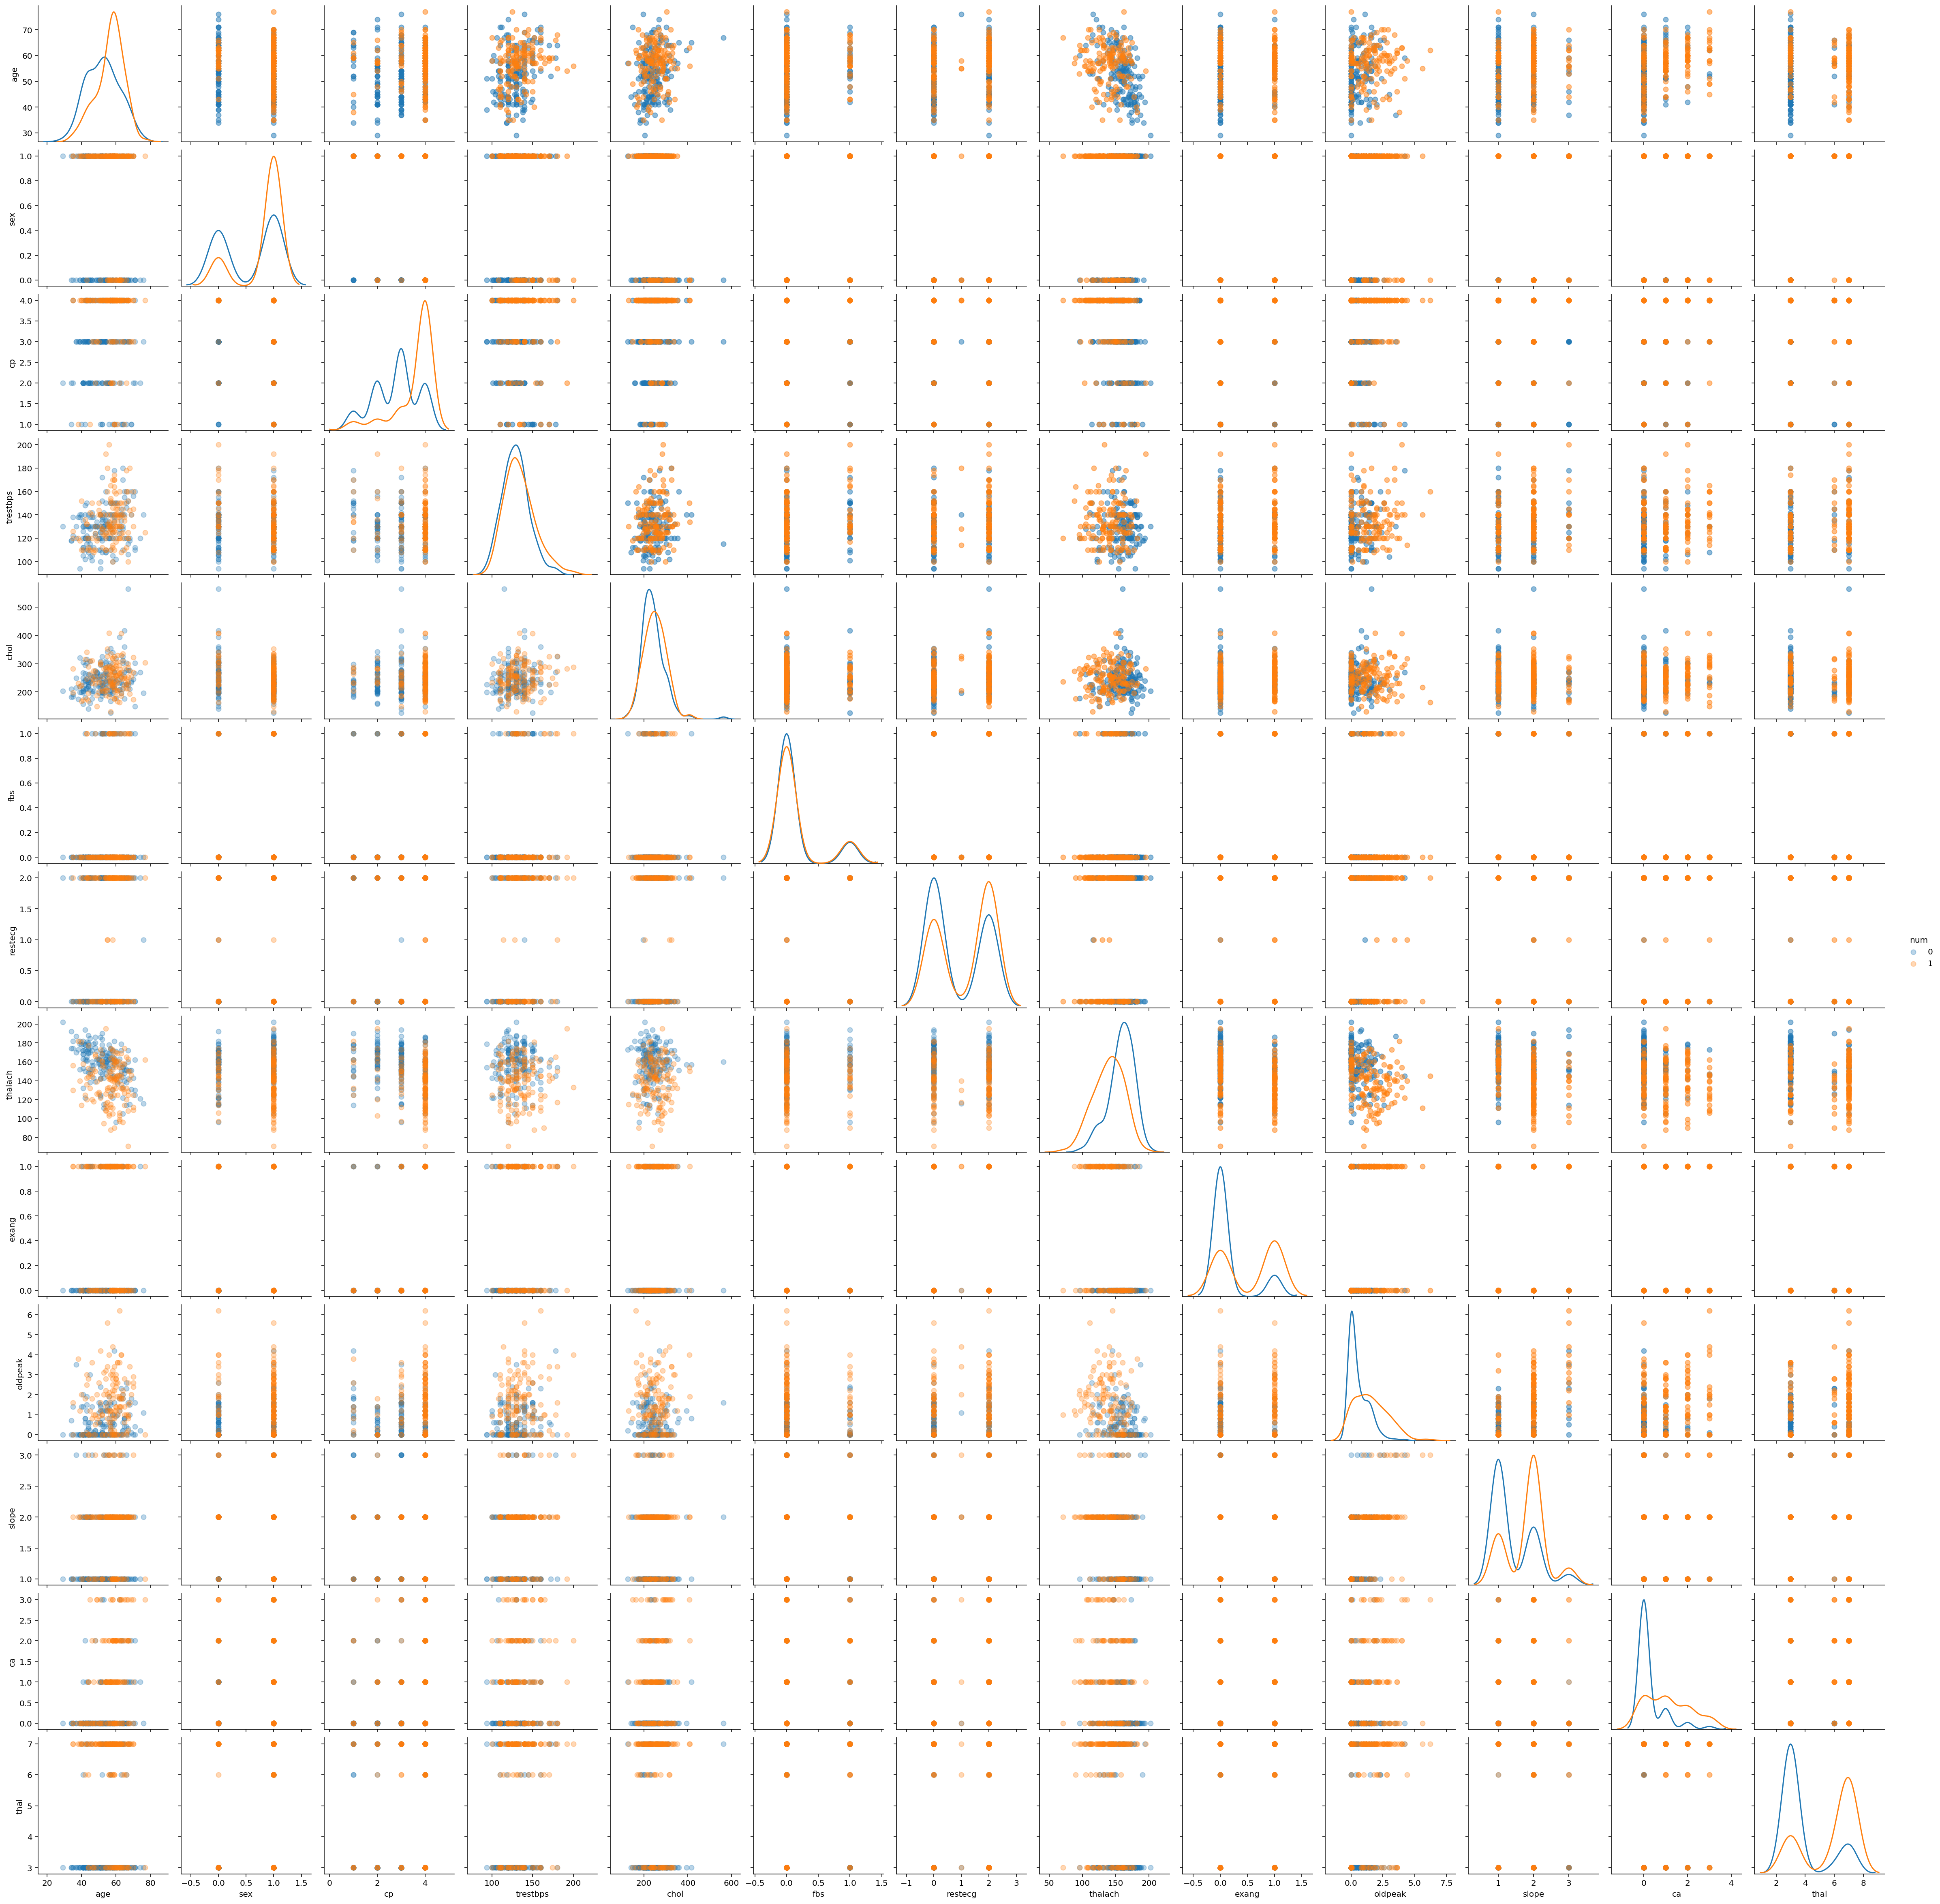

In [18]:
g=sns.PairGrid(data=df, diag_sharey= False, hue='num')
# g.map_diag(plt.hist, bins=20, alpha=0.9, density=False, histtype='barstacked')
g.map_diag(sns.kdeplot)
g.map_upper(plt.scatter, alpha = 0.5)
g.map_lower(sns.regplot,fit_reg= False, scatter_kws={'alpha':0.3})

g.add_legend()

In [19]:
X = df.drop('num', axis=1)

In [20]:
y = df.num

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.20, random_state=20)

In [23]:
import sklearn
sklearn.__version__

'0.24.1'

# Imputing NaN



In [24]:
from sklearn.impute import SimpleImputer

In [25]:
imputer = SimpleImputer(strategy = 'most_frequent')

In [26]:
imputer.fit(X_train)

SimpleImputer(strategy='most_frequent')

In [27]:
X_train = imputer.transform(X_train)
X_test = imputer.transform(X_test)

In [28]:
np.isnan(X_train).sum()

0

In [29]:
np.isnan(X_test).sum()

0

# One Hot Encoding

In [30]:
from sklearn.preprocessing import OneHotEncoder

In [31]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

In [32]:
mask = df.columns.isin(['cp', 'restecg', 'slope', 'thal'])[:-1]

In [33]:
enc = OneHotEncoder(categorical_features=mask, sparse=False)

TypeError: __init__() got an unexpected keyword argument 'categorical_features'

In [ ]:
enc.fit(X_train)

In [ ]:
X_train2 = enc.transform(X_train)
X_test2 = enc.transform(X_test)

In [ ]:
X_train2[0]

In [ ]:
X_train2.shape

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
from sklearn import metrics

In [ ]:
clf = LogisticRegression()

In [ ]:
clf.fit(X_train2, y_train)

In [ ]:
pred = clf.predict(X_test2)

In [ ]:
metrics.accuracy_score(y_test, pred)

In [ ]:
metrics.zero_one_loss(y_test,pred) + metrics.accuracy_score(y_test, pred)

In [ ]:
metrics.confusion_matrix(y_test, pred)

In [ ]:
print(metrics.classification_report(y_test, pred))

In [ ]:
df.num.value_counts() # balanced data

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
clf = LogisticRegression(C=1)

In [ ]:
C_vals = [0.0001, 0.001, 0.01, 0.03, 0.1, 0.3, 0.6, 1, 1.3, 1.6, 2, 5, 10, 15, 20, 50, 100]
C_vals

In [ ]:
scores = []
for C in C_vals:
    clf = LogisticRegression(C=C)
    clf.fit(X_train2, y_train)
    pred=clf.predict(X_test2)
    scores.append(metrics.zero_one_loss(y_test, pred))

In [ ]:
plt.plot(scores)
plt.xticks(np.arange(len(C_vals)), C_vals, rotation=45)
plt.xlabel('C')
plt.ylabel('Test Error')

plt.show()

## Decision Tree

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [ ]:
dt = DecisionTreeClassifier()

In [ ]:
# dir(dt)

In [ ]:
dt.fit(X_train, y_train)

In [ ]:
y_pred = dt.predict(X_test)

In [ ]:
metrics.accuracy_score(y_test, y_pred)

In [ ]:
print(metrics.classification_report(y_test, pred))

### Apply cross validation using default tree

In [4]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

In [ ]:
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)

In [ ]:
dt = DecisionTreeClassifier()
scores = cross_val_score(dt, X=X_train, y=y_train, scoring='accuracy', cv=cv, n_jobs=1, )
print('CV accuracy scores: %s' % scores)

In [ ]:
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

### Apply cross-validation to find an optimum parameter value

`min_samples_split` is one of the parameters in decision trees that can lead to overfitting if not controlled. Let's see which value works best.

In [1]:
min_samples_split = [5, 10, 20, 25, 30, 40, 50]

In [6]:
scores_params = []
for m in min_samples_split:
    dt = DecisionTreeClassifier(min_samples_split=m)
    scores = cross_val_score(dt, X=X_train, y=y_train, scoring='accuracy', cv=cv)
#     print(scores)
    scores_params.append(scores.mean())

NameError: name 'X_train' is not defined

In [ ]:
scores_params

In [ ]:
plt.plot(scores_params, label = 'train')
# plt.plot(scores_val, label = 'val')
plt.xticks(np.arange(len(min_samples_split)), min_samples_split, rotation=45)
plt.xlabel('min_samples_split')
plt.ylabel('Score')
plt.title('Validation Curve')
plt.legend()
plt.show()

### Different metrics can be used when evaluating a model

In [ ]:
sorted(sklearn.metrics.SCORERS.keys())

### Grid Search

Many times we will have to go through many parameters. `GridSearchCV()` in sklearn makes this process very easy.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

In [ ]:
params = dict(
    min_samples_split = [5, 10, 20, 30, 40, 50],
    max_depth = [1,2,3,None],
    ccp_alpha = [0.0, 0.010, 0.015, 0.020, 0.025]
)

params

In [ ]:
dt = DecisionTreeClassifier()
gs = GridSearchCV(estimator=dt, param_grid=params, scoring='f1', cv=cv, n_jobs=-1, )
gs

In [ ]:
gs.fit(X_train, y_train)

In [ ]:
gs.best_estimator_

In [ ]:
gs.best_params_

In [ ]:
best_estimator = gs.best_estimator_

In [ ]:
best_estimator.get_depth()

In [ ]:
pred = best_estimator.predict(X_test)

In [ ]:
metrics.accuracy_score(y_test, pred)

In [ ]:
print(metrics.classification_report(y_test, pred))

In [ ]:
metrics.confusion_matrix(y_test, pred)

In [ ]:
metrics.plot_confusion_matrix(best_estimator, X_test, y_test, colorbar=False);

In [ ]:
def plot_feature_importances(model, df):
    n_features = df.shape[1]
    df_colnames= df.columns
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), df_colnames)
    plt.xlabel("Feature importance")
#     plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances(best_estimator, df=X)

### Learning curve using sklearn
Learning curve of the best estimator

In [ ]:
from sklearn.model_selection import learning_curve, validation_curve

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(estimator=dt,
                                            X=X_train,
                                            y=y_train,
                                            train_sizes=np.linspace(0.02, 1.0, 20),
                                            cv=cv,
                                            n_jobs=1)

In [ ]:
np.linspace(0.01, 1.0, 20)

In [ ]:
X_train.shape[0]

In [ ]:
# 10-fold CV is used
# Min number of points left for training is size* 0.9
X_train.shape[0] * 0.02 * 0.9

In [ ]:
# 10-fold CV is used
# Max number of points left for training is size* 0.9
X_train.shape[0] * 0.9

In [ ]:
train_sizes

In [ ]:
train_scores.shape

In [ ]:
test_scores[0:2]

In [ ]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=[8,6])
plt.plot(train_sizes, train_mean,
    color='blue', marker='o',
    markersize=5, label='Training accuracy')
plt.fill_between(train_sizes,
    train_mean + train_std,
    train_mean - train_std,
    alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean,
    color='green', linestyle='--',
    marker='s', markersize=5,
    label='Validation accuracy')
plt.fill_between(train_sizes,
    test_mean + test_std,
    test_mean - test_std,
    alpha=0.15, color='green')
plt.grid()
plt.xlabel('Number of training examples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.20, 1.03])
plt.show()

### Validation curve using sklearn

In [ ]:
dt = DecisionTreeClassifier()

In [ ]:
param_range = (np.linspace(X_train.shape[0]/50, X_train.shape[0]/3, 20)).astype(int)
param_range

In [ ]:
train_scores, test_scores = validation_curve(
    estimator=dt,
    X=X_train,
    y=y_train,
    param_name='min_samples_split',
    param_range=param_range,
    cv=10)

In [ ]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=[8,6])
plt.plot(param_range, train_mean,
    color='blue', marker='o',
    markersize=5, label='Training accuracy')
plt.fill_between(param_range,
    train_mean + train_std,
    train_mean - train_std,
    alpha=0.15, color='blue')
plt.plot(param_range, test_mean,
    color='green', linestyle='--',
    marker='s', markersize=5,
    label='Validation accuracy')
plt.fill_between(param_range,
    test_mean + test_std,
    test_mean - test_std,
    alpha=0.15, color='green')
plt.grid()
plt.xlabel('Parameter')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.20, 1.03])
plt.show()